# 06. 무식하게 풀기

### 6.1 도입

- "무식하게 푼다(brute-force)"는 가능한 경우의 수를 일일이 나열하면서 답을 찾는 방식을 의미
- 이러한 방식을 흔히 완전 탐색(exhaustive search)이라고 부름

### 6.2 재귀 호출(recursion)과 완전 탐색

In [4]:
def recursiveSum(n):
    if n == 1:
        return 1
    return n + recursiveSum(n-1)

-> 위 함수처럼 함수안에서 다시 한번 자기 자신을 호출해 실행하는 함수를 의미함.

-> 모든 재귀 함수는 이와같이 "더이상 쪼개지지 않는" 최소한의 작업에 도달했을 때 답을 곧장 반환하는 조건문을 포함해야함. 이때 쪼개지지 않는 가장 작은 작업들을 가리켜 재귀 호출의 기저 사례(base case)라고 함.

예제: 중첩 반복분 대체하기

-> 0번부터 차례대로 번호 매겨진 n개의 원소 중 네 개를 고르는 모든 경우를 출력하는 코드를 작성해 봅시다.

In [7]:
def pick(n, toPick, picked = []):
    ## 기저 사례: 더 고를 원소가 없을 때 고른 원소들을 출력한다.
    if toPick == 0:
        print(picked)
        return
    ## 고를 수 있는 가장 작은 번호를 계산한다.
    if len(picked) == 0:
        smallest = 0
    else:
        smallest = picked[-1] + 1
    ## 이 단계에서 원소 하나를 고른다.
    for i in range(smallest, n-toPick+1):
        picked.append(i)
        pick(n, toPick - 1, picked)
        picked.pop()

In [ ]:
pick(10,3)

예제: 보글 게임

In [1]:
dx = (-1, -1, -1, 1, 1, 1, 0, 0)
dy = (-1, 0, 1, -1, 0, 1, -1, 1)

def hasWord(y, x, word):
    ## 기저 사례 1: 시작 위치가 범위 밖이면 무조건 실패
    if inRange(y,x) == False:
        return False
    ## 기저 사례 2: 첫 글자가 일치하지 않으면 실패
    if board[y][x] != word[0]:
        return False
    ## 기저 사례 3: 단어 길이가 1이면 성공
    if len(word) == 1:
        return True
    ## 인접한 여덟 칸을 검사한다.
    for direction in range(8):
        nextY = y + dy[direction]; nextX = x + dx[direction]
        
        if hasWord(nextY, nextX, word[1:]):
            return True
    return False

def inRange(y,x):
    if y > 4 or y < 0 or x > 4 or x < 0:
        return False
    return True

def findFirstChr(word):
    for y_idx in range(0,5):
        for x_idx in range(0,5):
            if board[y_idx][x_idx] == word[0]:
                if hasWord(y_idx, x_idx, word):
                    return "YES"
    return "NO"

if __name__ == "__main__" : 
    global board
    answers = []
    for _ in range(int(input())) : 
        board = []
        
        for _ in range(0,5) : 
            board.append([ch for ch in input()]) 
            
        word = [] 
            
        for _ in range(0,int(input())) : 
            word.append(input()) 
                
        for wd in word : 
            answers.append((wd, findFirstChr(wd)))
            
    for ans in answers:
        print(ans[0],ans[1])

2
URLPM
XPRET
GIAET
XTNZY
XOQRS
5
PRETTY
GIRL
REPEAT
KARA
PANDORA
NNNNS
NEEEN
NEYEN
NEEEN
NNNNN
4
YESR
SNNNNNNN
EEEEEEEEE
NEYN
PRETTY YES
GIRL YES
REPEAT YES
KARA NO
PANDORA NO
YESR NO
SNNNNNNN YES
EEEEEEEEE YES
NEYN NO


### 6.3 시간복잡도 분석

-> 완전 탐색 알고리즘의 시간 복잡도를 계산하는 것은 비교적 단순

-> 가능한 후보의 수를 전부 세어 보기만 하면 됨

-> (문제점) : A로 가득찬 격자에서, 단어 AAAAH 를 찾는 것

-> 단어를 찾을 가능성이 없지만 완전 탐색은 이를 알 수 없음

-> 위 함수의 경우 $8^{N-1} = O$ 가 된다

-> 따라서 찾고자 하는 단어의 길이가 길어질수록 다른 알고리즘을 이용하는 것이 좋음

### 6.4 완전 탐색 레시피

다음은 완전 탐색으로 문제를 해결하기 위해 필요한 대략적인 과정임

1. 완전 탐색은 존재하는 모든 답을 하나씩 검사하므로, 걸리는 시간은 가능한 답의 수에 정확히 비례함. 최대 크기의 입력을 가정했을 때 답의 개수를 계산하고 이들을 모두 제한 시간 안에 생성할 수 있을지를 가늠함. 만약 시간안에 계산할 수 없다면 다른 설계 패러다임을 적용해야함.


2. 가능한 모든 답의 후보를 만드는 과정을 여러 개의 선택으로 나눔. 각 선택은 답의 후보를 만드는 과정의 한 조각이 됨.


3. 그중 하나의 조각을 선택한 답의 일부를 만들고, 나머지 답을 재귀 호출을 통해 완성


4. 조각이 하나밖에 남지 않은 경우, 혹은 하나도 남지 않은 경우에는 답을 생성했으므로, 이것을 기저 사례로 선택해 처리함.

### 6.5 이론적 배경: 재귀 호출과 부분 문제

재귀 호출의 중요한 개념중 하나로 문제(problem)와 부분 문제(subproblem)의 정의가 있음.

-> 책 참고

문제: 소풍

In [88]:

## taken[i] = i번째 학생이 짝을 이미 찾았으면 true, 아니면 false
def countPairings(taken):
    
    firstFree = -1
    for i in range(len(taken)):
        if taken[i] == False:
            firstFree = i
            break
            
    ## 기저 사례: 모든 학생이 짝을 찾았으면 한 가지 방법을 찾았으니 종료하다.
    if firstFree == -1:
        return 1
    
    ret = 0
    
    ## 이 학생과 짝지을 학생을 결정한다.
    for pairWith in range(firstFree + 1, n):
        if (taken[pairWith] == False) & (areFriends[firstFree][pairWith] == True):
            taken[firstFree] = True ; taken[pairWith] = True
            ret += countPairings(taken)
            taken[firstFree] = False ; taken[pairWith] = False
            
    return ret

if __name__ == "__main__" : 
    global areFriends
    
    answers = []
    for _ in range(int(input())) : 
        
        n,m = map(int, input().split())
        
        friend_list = list(map(int, input().split()))
        
        taken = [False for _ in range(n)]
        areFriends = [[False for _ in range(n)] for _1 in range(n)]

        for idx_ in range(0, len(friend_list), 2):
            y = friend_list[idx_]
            x = friend_list[idx_+1]
            areFriends[x][y] = True
            areFriends[y][x] = True
            
        
        answers.append(countPairings(taken))
        
    for ans in answers:
        print(ans)

1
4 6
0 1 1 2 2 3 3 0 0 2 1 3
3


문제: 게임판 덮기

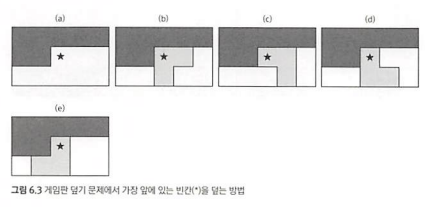

1. { {0,0}, {1,0}, {0,1} }

2. { {0,0}, {0,1}, {1,1} }

3. { {0,0}, {1,0}, {1,1} }

4. { {0,0}, {1,0}, {1,-1} }

In [105]:
coverType = (((0,0),(1,0),(0,1)),
             ((0,0),(0,1),(1,1)),
             ((0,0),(1,0),(1,1)),
             ((0,0),(1,0),(1,-1)))

## 퍼즐을 넣을 수 있는지 없는지 판단.
def set_func(board, y, x, type_, delta):
    ok = True
    for i in range(3):
        ny = y + coverType[type_][i][0]
        nx = x + coverType[type_][i][1]
        
        if (ny < 0) | (ny >= len(board)) | (nx < 0) | (nx >= len(board[0])):
            ok = False
        else:
            board[ny][nx] += delta
            if (board[ny][nx]) > 1:
                ok = False
        
            
    return ok

def cover(board):
    y = -1; x = -1;
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 0:
                y = i
                x = j
                break
        if y != -1:
            break
            
    ## 기저 사례: 모든칸을 채웠으면 1을 반환한다
    if y == -1:
        return 1
    
    ret = 0
    for type_ in range(4): # 4가지 채우는 방식
        if set_func(board, y, x, type_, 1):
            ret += cover(board)
        
        ## 덮었던 블록을 치운다
        set_func(board, y, x, type_, -1)
        
    return ret

if __name__ == "__main__" : 
    global board
    
    answers = []
    for _ in range(int(input())) : 
        
        n,m = map(int, input().split())
        
        board = []
        
        for y_idx in range(n):
            pointer = input()
            board.append([1 if ch == '#' else 0 for ch in pointer])
    
            
#         print(board)
        answers.append(cover(board))
        
    for ans in answers:
        print(ans)

1
8 10
##########
#........#
#........#
#........#
#........#
#........#
#........#
##########
1514


### 6.7 최적화 문제

-> 어떤 기준에 따라 가장 '좋은' 답을 찾아 내는 문제들을 통칭해 최적화 문제라고 함.

-> 완전 탐색도 이중 하나

-> 이외에도 동적 계획법, 조합 탐색 등 다양한 방법들이 존재

예제: 여행하는 외판원 문제

In [106]:
sum([True, True])

2

In [201]:
n = 3
dist = [[0.0000000000,  611.6157225201,  648.7500617289],
        [611.6157225201,  0.0000000000,  743.8557967501],
        [648.7500617289,  743.8557967501,  0.0000000000]]

visited = [False for _ in range(n)]
allLength = []

def shortestPath(dist, visited, current_length=0, path=[]):
    if len(path) == n:
        return current_length
    
    for next_ in range(n):
        if visited[next_] == False:
            if len(path) == 0:
                here = next_
#                 print('in')
            else:
                here = path[-1]
            visited[next_] = True
            path.append(next_)

            cand = shortestPath(dist, visited, current_length + dist[here][next_], path)

            allLength.append(cand)
            visited[next_] = False
            path.pop()
            
    return min(allLength)

In [202]:
shortestPath(dist,visited)

1260.3657842490002

### 6.8 문제: 시계 맞추기

-> 어떤 스위치를 네 번 누르면 연결된 시계는 모두 12시간씩 앞으로 이동하므로 누르지 않은 것과 동일

-> 따라서 스위치를 누르는 횟수는 0에서 3사이의 정수여야 함

In [4]:
temp_ = [
        [0, 1, 2],
        [3, 7, 9, 11],
        [4, 10, 14, 15],
        [0, 4, 5, 6, 7],
        [6, 7, 8, 10, 12],
        [0, 2, 14, 15],
        [3, 14, 15],
        [4, 5, 7, 14, 15],
        [1, 2, 3, 4, 5],
        [3, 4, 5, 9, 13]
    ]

In [5]:
linked = [['.' for _ in range(16)] for _1 in range(10)]
for x,k in enumerate(temp_):
    for y in k:
        linked[x][y] = 'x'

In [ ]:
INF = 9999
SWITCHES = 10
CLOCKS = 16


def push(clocks, swtch):
    for clock in range(CLOCKS):
        if linked[swtch][clock] == 'x':
            clocks[clock] += 3
            if clocks[clock] == 15:
                clocks[clock] = 3
                
## 모든 시계가 12시를 가리키고 있는지 확인
def areAligned(clocks):
    for i in range(CLOCKS):
        if clocks[i] != 12:
            return False
    return True
    
        
def solve(clocks, swtch=0):
    if swtch == SWITCHES:
        if areAligned(clocks):
            return 0
    
    ret = INF
    for cnt in range(4):
#         print(ret)
        ret = min(ret, cnt+solve(clocks, swtch+1))
        push(clocks, swtch)
        
    return ret

if __name__ == "__main__" : 
    global board
    
    answers = []
    for _ in range(int(input())) : 
        
        clocks = list(map(int, input().split()))
        
        answers.append(solve(clocks, 0))
        
    for ans in answers:
        print(ans)

2
12 6 6 6 6 6 12 12 12 12 12 12 12 12 12 12


1
12 6 6 6 6 6 12 12 12 12 12 12 12 12 12 12
2


-> 그외에 모든 순열 만들기, 모든 조합 만들기, $2^n$ 가지 경우의 수 만들기에서 완전탐색법이 사용될 수 있음

In [ ]:
# # from typing import Dict, List
# from collections import deque, defaultdict, OrderedDict, Counter
# from heapq import heapify, heappush, heappop
# from bisect import bisect_left, bisect_right
# from functools import lru_cache
# from itertools import combinations, permutations
# import re
# import sys
# inf = float('inf')
# sys.setrecursionlimit(10**9)
# MOD = 10**9+7


# def solve(clocks):
#     clocks = [num // 3 % 4 for num in clocks]
#     switches = [
#         [0, 1, 2],
#         [3, 7, 9, 11],
#         [4, 10, 14, 15],
#         [0, 4, 5, 6, 7],
#         [6, 7, 8, 10, 12],
#         [0, 2, 14, 15],
#         [3, 14, 15],
#         [4, 5, 7, 14, 15],
#         [1, 2, 3, 4, 5],
#         [3, 4, 5, 9, 13]
#     ]

#     def create(idx, arr):
#         if idx == len(arr):
#             yield arr
#             return
#         if idx in [1, 4, 9]:
#             yield from create(idx+1, arr)
#             return
#         for i in range(4):
#             arr[idx] = i
#             yield from create(idx+1, arr)
#             arr[idx] = 0
#     ans = inf
#     base = [0]*len(switches)
#     base[9] = (4-clocks[13]) % 4
#     base[4] = (4-clocks[12]) % 4
#     base[1] = (4-clocks[11]) % 4
#     for arr in create(0, base[:]):
#         cur = clocks[:]
#         for i, a in enumerate(arr):
#             for s in switches[i]:
#                 cur[s] = (cur[s]+a) % 4
#         if all(c == 0 for c in cur):
#             ans = min(ans, sum(arr))
#     return ans if ans != inf else -1


# t = int(input())
# for _ in range(t):
#     print(solve(list(map(int, input().split()))))